In [ ]:
# Forex prediction data analysis
# objectives 
# 1. load the dataset
# 2. Inspect the data for empty values , wrong data types, wrong formats, duplicates and outliers
# 3. Analyze the data to find patterns and relationships
# 4. Visualize the data to gain insights. to understand the trends and distributions
# 5. Evaluate the model performance using appropriate metrics
# 6. Identify patterns and correlations in EUR/USD exchange rate movements 
# 7. Save the cleaned and processed data for future use 


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np # for numerical operations or data
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for correlation
from datetime import datetime # downloaded from pip install datetime 





In [4]:
# load the dataset and perform initial inspection

df = pd.read_csv('forex_predictions_data.csv')

# initial inspection

df.head()


,Date,Open,High,Low,Close,Volume,Predicted_Close,Currency_Pair,Signal,Confidence
0,2024-01-01,1.18727,1.92461,0.85312,1.18154,2201,1.22984,EUR/USD,Hold,0.90
1,2024-01-02,1.47536,1.82881,0.54067,1.32296,error,1.03797,EUR/USD,Sell,NaN
2,2024-01-03,1.36600,1.78415,0.54242,1.28539,4420,1.03888,EUR/USD,Sell,NaN
3,2024-01-04,1.29933,1.54684,0.99332,1.17805,4079,1.00117,EUR/USD,Sell,0.64
4,2024-01-05,1.07801,1.68386,0.68714,NaN,1832,1.48385,EUR/USD,Sell,0.68


In [6]:
# more intial inspection

df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             226 non-null    object 
 1   Open             224 non-null    float64
 2   High             220 non-null    float64
 3   Low              225 non-null    float64
 4   Close            212 non-null    float64
 5   Volume           226 non-null    object 
 6   Predicted_Close  222 non-null    float64
 7   Currency_Pair    229 non-null    object 
 8   Signal           227 non-null    object 
 9   Confidence       218 non-null    float64
dtypes: float64(6), object(4)
memory usage: 18.0+ KB


Date                object
Open               float64
High               float64
Low                float64
Close              float64
Volume              object
Predicted_Close    float64
Currency_Pair       object
Signal              object
Confidence         float64
dtype: object

In [7]:
# Describe the dataset

df.describe()

,Open,High,Low,Close,Predicted_Close,Confidence
count,224.000000,220.000000,225.000000,212.000000,222.000000,218.000000
mean,1.239946,1.753113,0.750030,1.245072,1.250415,0.756468
std,0.148956,0.147816,0.150434,0.140594,0.156102,0.135125
min,1.002530,1.505420,0.505680,1.002320,1.000120,0.500000
25%,1.111860,1.638832,0.614320,1.122535,1.115280,0.652500
50%,1.248105,1.763400,0.746310,1.235910,1.259605,0.760000
75%,1.365100,1.877682,0.877570,1.368805,1.392158,0.870000
max,1.493440,1.995250,0.999860,1.498440,1.499680,1.000000


In [8]:
# shape of the data

df.shape

(229, 10)

In [9]:
# Handling bad data , empty cells/values, wrong data, wrong formats, duplicates and outliers
# Empty cells/values use the isnull() method

print('Missing values in each column')
df.isnull()

Missing values in each column


,Date,Open,High,Low,Close,Volume,Predicted_Close,Currency_Pair,Signal,Confidence
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
224,False,False,False,False,False,False,False,False,False,False
225,False,False,False,False,True,False,False,False,False,False
226,False,False,False,True,False,False,False,False,False,False
227,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Date                3
Open                5
High                9
Low                 4
Close              17
Volume              3
Predicted_Close     7
Currency_Pair       0
Signal              2
Confidence         11
dtype: int64

In [12]:
# Handling missing values 
# we use the fillna() method to replace missing values with appropriate values 
# for numerical data we can fill missing data using mean or median and mode but not average

numeric_cols=['Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close', 'Confidence']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')# convert to numeric, coercing errors to NaN . error to NaN (not a number) therefore the error becomes an empty cell
        # fill NaN values with the mean of the column
        df[col] = df[col].fillna(df[col].median())
        
# for categorical data we can fill missing data using mode only

categorical_cols=['Signal']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        
# check for missing values again

print('Missing values after handling')
print(df.isnull().sum())

Missing values after handling
Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64


In [15]:
# Data in wrong format
# Convert date column to datetime format

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Handle volume column with error value
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# fill NaN values with the median
df['Volume'] = df['Volume'].fillna(df['Volume'].median())

# clean the confidence column
df['Confidence'] = pd.to_numeric(df['Confidence'], errors='coerce')
df['Confidence'] = df['Confidence'].fillna(df['Confidence'].median())

# check the dates column for invalid dates 
invalid_dates = df[~df['Date'].apply(lambda x: isinstance(x, datetime))]
if not invalid_dates.empty:
    print('Invalid dates found')
    print(invalid_dates)
    
# Remove duplicates
df.drop_duplicates(inplace=True)

#check for duplicates
duplicates_count = df.duplicated().sum()

# Remove duplicates if any
if duplicates_count > 0:
    df.drop_duplicates(inplace=True)
    print('Duplicates removed')
else:
    print('No duplicates found')

No duplicates found


In [16]:
# Wrong Data types
price_cols = ['Open', 'High', 'Low', 'Close', 'Predicted_Close']
for col in price_cols:
    if col in df.columns:
        # Remove extreme outliers (beyond 3 standard deviation)
        mean = df[col].mean()
        std = df[col].std()
        df[col] = df[col].apply(lambda x: mean if x < mean - 3 * std or x > mean + 3 * std else x)
# fill NaN values in price columns with the median
        df[col] = df[col].fillna(df[col].median())
        
# check dat types after conversion
print('Data types after conversion')
print(df.dtypes)  

Data types after conversion
Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                    float64
Predicted_Close           float64
Currency_Pair              object
Signal                     object
Confidence                float64
dtype: object


In [17]:
print(df.duplicated().sum())

0


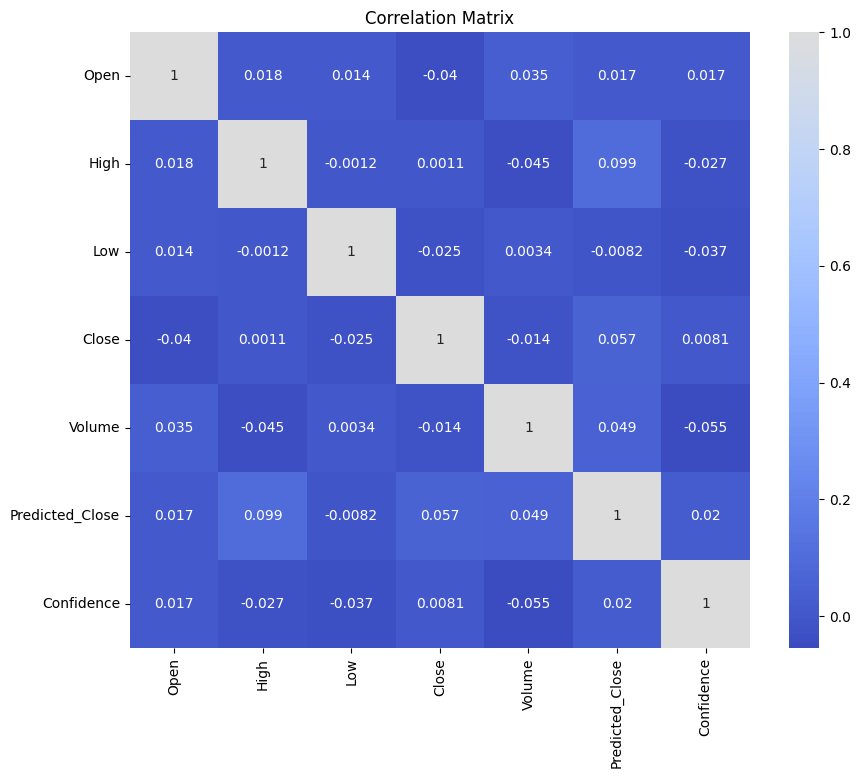

In [18]:
# Analysis
# Correlation analysis
# Calculate correlation matrix

corr_matrix = df[[ 'Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close', 'Confidence']].corr()
# display or plot the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=True)
plt.title('Correlation Matrix')
plt.show()

    


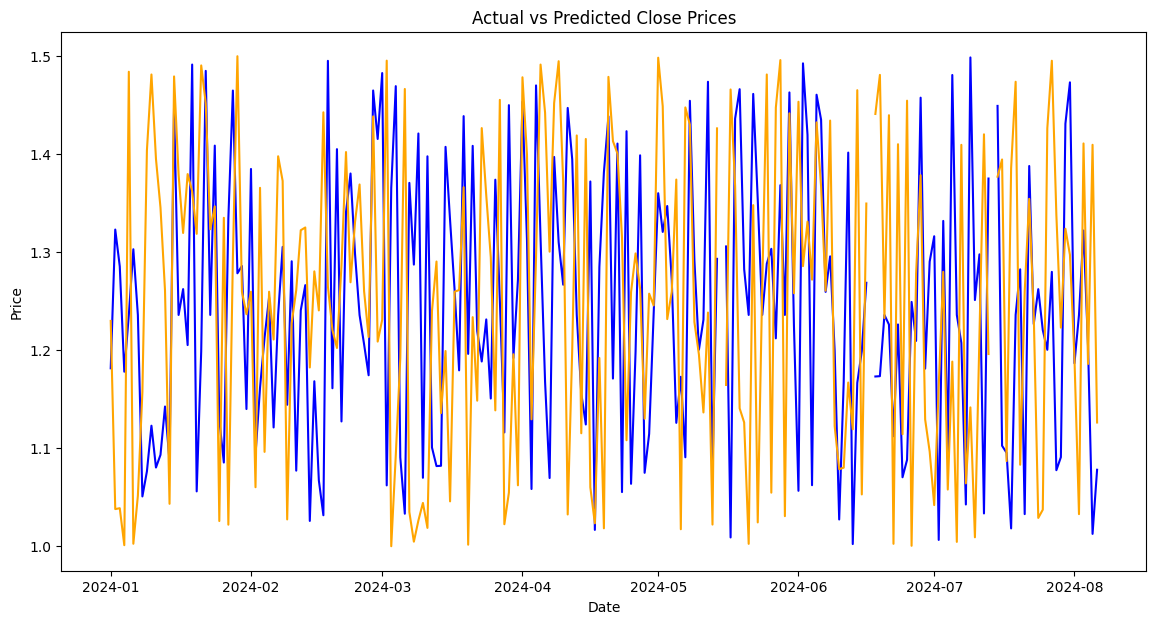

C:\Users\ALEX\AppData\Local\Temp\ipykernel_14960\2345503946.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


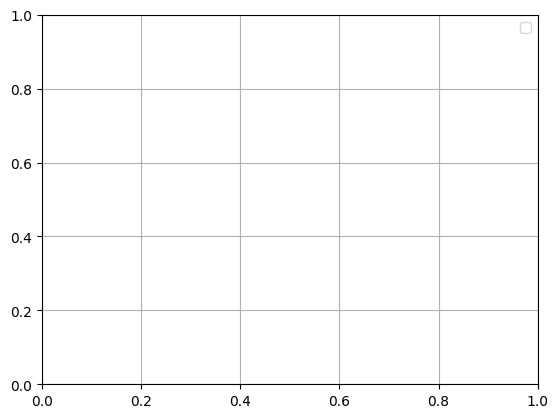

In [19]:
# actual vs predicted close prices 

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Close', color='blue')
plt.plot(df['Date'], df['Predicted_Close'], label='Predicted Close', color='orange')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
plt.legend()
plt.grid()

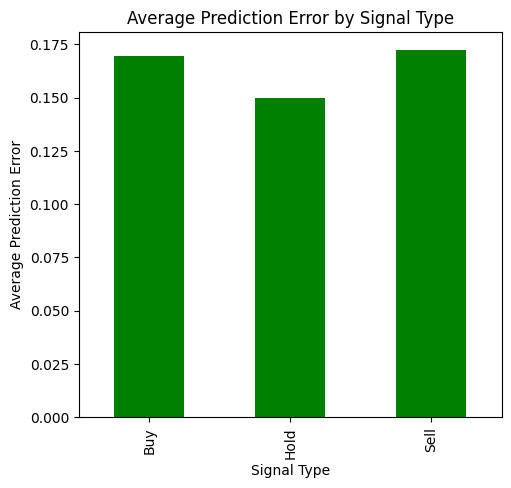

In [20]:
# Signal performance Analysis

df['Prediction_Error'] = abs(df['Close'] - df['Predicted_Close'])

# Analyze error by signal type

signal_error = df.groupby('Signal')['Prediction_Error'].mean()
signal_confidence = df.groupby('Signal')['Confidence'].mean()

# plotting the average prediction error by signal type 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
signal_error.plot(kind='bar', color='green')
plt.title('Average Prediction Error by Signal Type')
plt.xlabel('Signal Type')
plt.ylabel('Average Prediction Error')
plt.show()



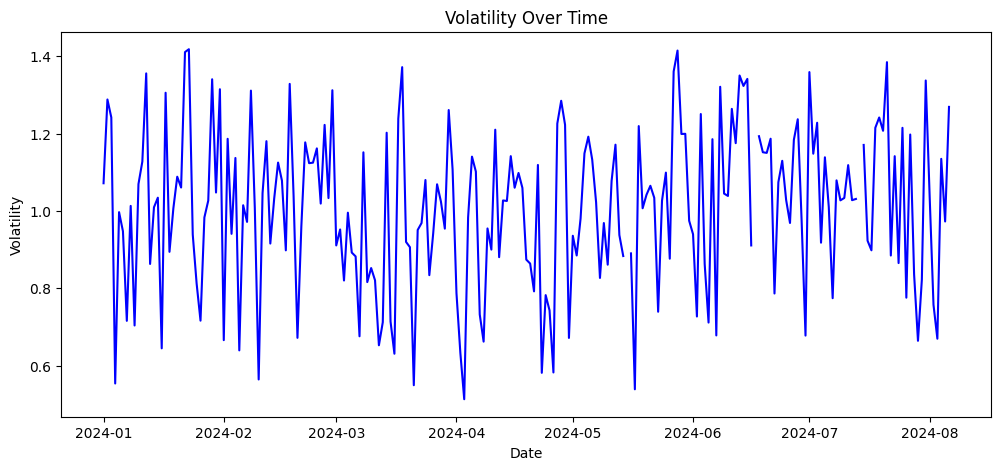

In [21]:
# Volatility Analysis
# Calculate daily returns
df['Daily_Range'] = df['High'] - df['Low']

# plot volatility over time

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Daily_Range'], color='blue')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()